# Model selection and  assessment

Typically there are two parts to solving a prediction problem: model selection and model assessment. In model selection we estimate the performance of various competing models with the hope of choosing the best one. Having chosen the final model, we assess the model by estimating the prediction error on new unseen data.

Remember that the best model is defined as the one with the lowest EPE:

<div align="center">$EPE(\beta)=\mathbb{E}\bigg{[}L(Y-f_{\beta}(X))\bigg{]}$</div>


Where $Y$ and $X$ are drawn at random from the population, $L$ is the chosen loss function and $\beta$ are the paramemeters of the model $f$. The expectation averages anything that is random.

### Split samples

When the amount of data permits it, a good approach to model selection and assessment is **data splitting**. The idea is simple: divide the data in three parts: 
- train;
- validation;
- test.

We use the train and validation data to select the best model and the test data to assess the chosen model.
The recipe is the following:

1.  In the first part, model selection, the validation set is treated as the test data.  We train all competing model on the train data and define the best model as the one that predicts best in the validation set.  We could re-split the train/validation data, do this many times, and select the method that, on average, best performs.

2.  Because we chose the best model among many competitors, the observed performance will be a bit biased. Therefore, to appropriately assess performance on independent data we look at the score on the test set.

3. Finally,  we  can  re-split  everything  many  times  and  obtain  average  results  from steps 1. and 2.


**A common problem: when the amout of data is limited, the results from fitting a model to splitted data can be substantially different to fitting to all the data. Indeed, when the number of samples is small (smaller than the number of variables) we do not have enough examples to approach the problem as described above. Thus, we need to perform a cross-validation procedure that returns a mean error score on the data.**

## Exercise #1 : Splitting Techniques

Given the California-housing dataset, get 5 splits with the following methods:

- **K-fold** : split dataset into k consecutive folds. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
- **Monte Carlo** : randomly split the dataset into training and test sets(we need to specify the percentage of the test data points and an initial random state for reshuffling the data. We set `test_size = 0.2` and `random_state = 1`). 
- **Leave One Out** : provides train/test indices to split data in train/test sets. Each sample is used once as a test set (singleton) while the remaining samples form the training set.

Compute the mean and standard deviation at different splits for each feature. 


**What can you observe?**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import ShuffleSplit, LeaveOneOut, KFold

#the following are just the features (we don't include the target variable)
cal_housing = fetch_california_housing()
df = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)

In [2]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
print (df.count())

MedInc        20640
HouseAge      20640
AveRooms      20640
AveBedrms     20640
Population    20640
AveOccup      20640
Latitude      20640
Longitude     20640
dtype: int64


In [4]:
dfmax = df.max(axis=0).to_frame().T
dfmin = df.min(axis=0).to_frame().T


In [5]:
dfmax.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,15.0001,52.0,141.909091,34.066667,35682.0,1243.333333,41.95,-114.31


In [6]:
dfmin.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.4999,1.0,0.846154,0.333333,3.0,0.692308,32.54,-124.35


In [7]:
target = pd.DataFrame(cal_housing.target, columns=["avg"])
target.head()

,avg
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [8]:
#K-Fold splitting technique
from IPython.display import display
import pylab as pl


#It is not necessary to perform a plot of the points, since we have just five outputs for each feature (for each method employed)
KF = KFold(5)
X_train_means = []
X_test_means = []
X_train_stds = []
X_test_stds = []
for train_index, test_index in KF.split(df):
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    X_train_means.append(X_train.mean(axis=0).to_frame().T)
    X_test_means.append(X_test.mean(axis=0).to_frame().T)
    X_train_stds.append(X_train.std(axis=0).to_frame().T)
    X_test_stds.append(X_test.std(axis=0).to_frame().T)
    
merged_means_train = pd.concat(X_train_means)
merged_stds_train = pd.concat(X_train_stds)
merged_means_test = pd.concat(X_test_means)
merged_stds_test = pd.concat(X_test_stds)


print ("Training set means: \n")
display(merged_means_train.head())
print ("Training set stds: \n")
display(merged_stds_train.head())
print ("Test set means: \n")
display(merged_means_test.head())
print ("Test set stds: \n")
display(merged_stds_test.head())




Training set means: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.932357,28.522771,5.373039,1.088496,1458.764898,3.088485,35.317798,-119.315755
0,3.940485,26.848413,5.618163,1.109013,1412.999818,3.028588,36.037002,-119.916377
0,3.738725,29.624879,5.338881,1.089332,1406.421209,3.115386,35.811604,-119.755988
0,3.941336,28.924055,5.420407,1.094873,1411.583212,3.112913,35.738642,-119.729254
0,3.800451,29.277313,5.394509,1.101661,1437.614583,3.007904,35.254261,-119.131148


Training set stds: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.914082,12.547098,1.990115,0.340590,1170.414398,10.635111,2.078606,1.953438
0,1.890401,12.591136,2.666041,0.527587,1157.506262,11.601270,2.208899,2.100204
0,1.848466,12.677283,2.421215,0.470218,1076.132017,11.574726,2.152008,2.031187
0,1.963073,12.126977,2.563313,0.493704,1093.423685,11.459899,2.043913,1.893184
0,1.871632,12.789323,2.656793,0.513295,1160.662101,5.133051,2.086646,1.922787


Test set means: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.623926,29.106347,5.652842,1.129390,1292.324128,2.999337,36.888115,-120.585501
0,3.591415,35.803779,4.672349,1.047323,1475.384448,3.238923,34.011301,-118.183016
0,4.398453,24.697917,5.789476,1.126048,1501.698886,2.891734,34.912890,-118.824569
0,3.588011,27.501211,5.463370,1.103884,1481.050872,2.901624,35.204738,-118.931504
0,4.151550,26.088178,5.566961,1.076731,1376.925388,3.321658,37.142263,-121.323932


Test set stds: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.821122,12.729067,3.834819,0.811016,954.438401,9.324362,1.886039,1.875639
0,1.911947,9.679790,1.208931,0.080847,1024.804436,0.981620,0.108761,0.154084
0,2.007995,11.390318,2.645325,0.487356,1331.633950,1.849356,1.908313,1.695437
0,1.591476,14.218074,2.079675,0.384653,1275.367886,3.742503,2.423722,2.286076
0,1.984161,11.384654,1.533128,0.261913,1010.506171,20.831800,1.595000,1.198286


In [9]:
#K-Fold splitting technique
from IPython.display import display
import pylab as pl

KF = KFold(5, shuffle=True)
X_train_means = []
X_test_means = []
X_train_stds = []
X_test_stds = []
for train_index, test_index in KF.split(df):
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    X_train_means.append(X_train.mean(axis=0).to_frame().T)
    X_test_means.append(X_test.mean(axis=0).to_frame().T)
    X_train_stds.append(X_train.std(axis=0).to_frame().T)
    X_test_stds.append(X_test.std(axis=0).to_frame().T)
    
merged_means_train = pd.concat(X_train_means)
merged_stds_train = pd.concat(X_train_stds)
merged_means_test = pd.concat(X_test_means)
merged_stds_test = pd.concat(X_test_stds)


print ("Training set means: \n")
display(merged_means_train.head())
print ("Training set stds: \n")
display(merged_stds_train.head())
print ("Test set means: \n")
display(merged_means_test.head())
print ("Test set stds: \n")
display(merged_stds_test.head())




Training set means: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.867255,28.664729,5.435912,1.098820,1426.550569,3.102664,35.635164,-119.572213
0,3.878646,28.644319,5.439089,1.097221,1426.104469,2.983853,35.626869,-119.568830
0,3.880218,28.706032,5.429546,1.096484,1424.403706,3.099797,35.627009,-119.567903
0,3.870111,28.605196,5.428480,1.097220,1417.588360,3.056869,35.623834,-119.564067
0,3.857125,28.577156,5.411971,1.093631,1432.736616,3.110092,35.646432,-119.575509


Training set stds: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.898954,12.582779,2.601513,0.507541,1144.240835,11.600662,2.133979,2.003158
0,1.915269,12.568904,2.571151,0.495500,1145.197218,4.098072,2.133654,1.998635
0,1.905602,12.604063,2.518628,0.487747,1151.045458,11.597814,2.136343,2.005423
0,1.887306,12.583750,2.544432,0.490646,1098.842700,10.900140,2.133525,2.001374
0,1.891812,12.588245,2.100305,0.375777,1122.135304,11.604034,2.142234,2.009094


Test set means: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.884337,28.538517,5.401351,1.088094,1421.181444,2.942618,35.618653,-119.559671
0,3.838769,28.620155,5.388642,1.094493,1422.965843,3.417865,35.651831,-119.573203
0,3.832485,28.373304,5.426813,1.097441,1429.768895,2.954089,35.651272,-119.576911
0,3.872910,28.776647,5.431079,1.094497,1457.030281,3.125798,35.663970,-119.592253
0,3.924855,28.888808,5.497113,1.108850,1396.437258,2.912906,35.573580,-119.546485


Test set stds: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.903457,12.597686,1.880488,0.304148,1084.191921,1.017320,2.144035,2.005236
0,1.836613,12.653462,2.040461,0.375377,1080.151564,21.728206,2.145264,2.023241
0,1.876265,12.509243,2.288019,0.414020,1054.981786,1.141374,2.134537,1.996174
0,1.949312,12.593379,2.170792,0.400077,1257.637315,8.007014,2.145594,2.012224
0,1.930809,12.573236,3.599926,0.747030,1172.550652,0.843365,2.109891,1.981197


In [10]:
#Monte carlo splitting technique: I assume that sampling is done with replacement
montecarlo = ShuffleSplit(n_splits=5, train_size = 0.8, test_size=0.2, random_state=1)
X_train_means = []
X_test_means = []
X_train_stds = []
X_test_stds = []
merged_means_train = []
merged_stds_train = []
merged_means_test = []
merged_stds_test = []

for train_index, test_index in montecarlo.split(df):
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    X_train_means.append(X_train.mean(axis=0).to_frame().T)
    X_test_means.append(X_test.mean(axis=0).to_frame().T)
    X_train_stds.append(X_train.std(axis=0).to_frame().T)
    X_test_stds.append(X_test.std(axis=0).to_frame().T)

merged_means_train = pd.concat(X_train_means)
merged_stds_train = pd.concat(X_train_stds)
merged_means_test = pd.concat(X_test_means)
merged_stds_test = pd.concat(X_test_stds)


print ("Training set means: \n")
display(merged_means_train.head())
print ("Training set stds: \n")
display(merged_stds_train.head())
print ("Test set means: \n")
display(merged_means_test.head())
print ("Test set stds: \n")
display(merged_stds_test.head())


Training set means: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.876149,28.604469,5.441114,1.099598,1425.257146,3.094971,35.632194,-119.574288
0,3.881730,28.654736,5.443857,1.097834,1424.374818,3.099806,35.634843,-119.574466
0,3.867737,28.649830,5.431116,1.097640,1428.040274,3.024529,35.630650,-119.571675
0,3.865718,28.715480,5.417300,1.094114,1430.073159,3.090030,35.626502,-119.566360
0,3.880595,28.643411,5.438605,1.097162,1424.106589,3.106330,35.620266,-119.558601


Training set stds: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.891584,12.586046,2.613727,0.507173,1123.756792,11.597402,2.137087,2.007578
0,1.909833,12.603211,2.583646,0.497697,1113.470969,11.587364,2.133855,2.002612
0,1.883529,12.581868,2.602576,0.505508,1145.119591,6.438383,2.131473,2.001665
0,1.885953,12.566551,2.317227,0.413896,1149.009002,11.467947,2.131681,2.000564
0,1.904522,12.611618,2.576662,0.494128,1147.661540,11.600564,2.135507,2.001366


Test set means: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.848758,28.779554,5.380543,1.084985,1426.355136,2.973393,35.630533,-119.551369
0,3.826436,28.578488,5.369570,1.092041,1429.884448,2.954053,35.619935,-119.550656
0,3.882405,28.598110,5.420534,1.092814,1415.222626,3.255160,35.636705,-119.561822
0,3.890485,28.335514,5.475797,1.106921,1407.091085,2.993156,35.653299,-119.583081
0,3.830977,28.623789,5.390577,1.094727,1430.957364,2.927954,35.678241,-119.614118


Test set stds: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.932500,12.584152,1.810920,0.306460,1166.772916,1.160222,2.131666,1.987402
0,1.858808,12.516029,1.975706,0.363539,1205.570137,1.507340,2.144540,2.007335
0,1.963833,12.601747,1.874826,0.317516,1080.423575,19.327981,2.154030,2.011207
0,1.954419,12.658267,3.021388,0.661575,1063.638191,3.646414,2.153078,2.015547
0,1.880607,12.482280,2.012505,0.382548,1069.622478,1.019362,2.137361,2.011801


In [11]:
#Leave-one-out splitting technique
loo = LeaveOneOut()
X_train_means = []
X_test_means = []
X_train_stds = []
X_test_stds = []
merged_means_train = []
merged_stds_train = []
merged_means_test = []
merged_stds_test = []
i=0
for train_index, test_index in loo.split(df):
    if (i > 4):
        break
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    X_train_means.append(X_train.mean(axis=0).to_frame().T)
    X_test_means.append(X_test.mean(axis=0).to_frame().T)
    X_train_stds.append(X_train.std(axis=0).to_frame().T)
    X_test_stds.append(X_test.std(axis=0, ddof=0).to_frame().T)
    i=i+1
    
merged_means_train = pd.concat(X_train_means)
merged_stds_train = pd.concat(X_train_stds)
merged_means_test = pd.concat(X_test_means)
merged_stds_test = pd.concat(X_test_stds)


print ("Training set means: \n")
display(merged_means_train.head())
print ("Training set stds: \n")
display(merged_stds_train.head())
print ("Test set means: \n")
display(merged_means_test.head())
print ("Test set stds: \n")
display(merged_stds_test.head())


Training set means: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.870455,28.638888,5.428924,1.096679,1425.530210,3.070680,35.631753,-119.569576
0,3.870456,28.639857,5.428961,1.096681,1425.429478,3.070702,35.631753,-119.569576
0,3.870507,28.638355,5.428861,1.096676,1425.521779,3.070668,35.631754,-119.569575
0,3.870585,28.638355,5.428981,1.096676,1425.518775,3.070680,35.631754,-119.569575
0,3.870672,28.638355,5.428958,1.096676,1425.518436,3.070698,35.631754,-119.569575


Training set stds: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.899615,12.585568,2.474209,0.473922,1132.463507,10.386301,2.135947,2.003495
0,1.899617,12.585750,2.474227,0.473922,1132.469198,10.386299,2.135948,2.003495
0,1.899721,12.584812,2.474153,0.473922,1132.471075,10.386301,2.135948,2.003494
0,1.899828,12.584812,2.474232,0.473922,1132.473458,10.386301,2.135948,2.003493
0,1.899868,12.584812,2.474226,0.473922,1132.473717,10.386299,2.135948,2.003493


Test set means: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
0,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Test set stds: 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


https://stackoverflow.com/questions/32130954/pandas-standard-deviation-returns-nan
The standard deviation, for small numbers of samples, is sometimes computed by using the so-called sample standard deviation, which divides by N-1. This may result in output NaN values in the case of leave-one-out train-test splitting.
By adding ddof=0, we divide just by N. In pandas, the default is 1, whereas in numpy is 0, therefore if we use numpy we won't notice this problem. This is way I added the "ddof" parameter when computing the standard deviation on the test set in the leave-one-out case.

In this cell, I provide the motivations used to solve the next exercise (in which we are asked how to solve an imputation problem with cross validation methods)

These are the observations that I can make:

1) In the leave-one-out case, for each iteration, we are considering as training set almost the whole dataset, except for one sample. Therefore, we can guess that the mean value and standard deviation for each feature in the case of the training set will be more or less the same for each of the splits, within a very small tolerance. For what concerns the mean values of the test set, they will be exactly equal to the values in the dataset, therefore they are not stable. As a result, the standard deviations associated to the means are all 0, because for each test set we have just one sample. The mean results obtained by the leave-one-out split technique are not reliable to be used in an imputation procedure, because we are averaging out almost all the data: this situation does not reflect a real world situation, in which we may have access to just a subset of the entire population in the dataset. In other words, we may want to be statistically robust with respect to a fair train/test split on the dataset (or at least this is what I thought about it), and an imputation procedure which uses the mean of all our dataset may reduce the variability of our data when dealing with a consistent number of missing values. We have also to recall that leave-one-out cross validation methods are usually used, in general, when the amount of training data is small. In this case, the number of rows contained in the csv file is 20000, which I believe is enough to make statistics and train a model without employing a leave-one-out procedure, which is also expensive from the computational point of view with respect to KFold and ShuffleSplit. What we may want to do is therefore considering an imputation which uses the mean values, but that does not affect negatively the variance of our dataset.

2) If we employ the ShuffleSplit method from sklearn, we are adopting a sampling with replacement procedure, as we can see at the following links: https://stackoverflow.com/questions/34731421/whats-the-difference-between-kfold-and-shufflesplit-cv, https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html. In ShuffleSplit, the data is shuffled every time, and then split. This means the test sets may overlap between the splits.Therefore, we may not be able to "see" some of the points of the entire dataset in our training sets at least once when computing the means (we are more likely to have a greater degree of overlapping between training sets), and the computation of the mean itself may be executed on multiple "versions" of a subset of the whole dataset. We can guess, for this reason, that the mean values for some of the features in the training set may be less skewed from each other than in the K-Fold case (when setting shuffle=False). In fact, if we don't shuffle when using KFold, it it like we are fixing a particular "order" in the dataset while splitting, and therefore the mean values may get more easily shifted by outliers. We can have an intuition of this concept by looking at the outputs of the head function in the KFold(shuffle=False) and ShuffleSplit cases, for instance by considering the "AveRooms" and "Population" columns. The same happens for the corresponding standard deviations. It may therefore appear that a more reliable computation of the mean could be done by using the ShuffleSplit method. However, by using the ShuffleSplit method we may lose, as already explained, a substantial part of the data information when computing the mean. We therefore may want to choose an intermediate solution between the two, since in the KFold(shuffle=False) case we are forcing a particular ordering of the data. Such solution could be, for instance, using KFold with shuffle=True, so that we shuffle the data once before splitting.


### Imputation Using (Mean/Median) Values:
Many real-world datasets may contain missing values for various reasons.
Training a model with a dataset that has a lot of missing values can drastically impact the model’s quality.
One way to handle this problem is to get rid of the observations that have missing data. However, you will risk losing data points with valuable information. A better strategy would be to impute the missing values.


One strategy of imputing is to compute the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others.

**Among the previous strategies of splitting, which one would you suggest to use for imputing missing data? Give reason to your answer.**

For the motivations provided in the previous exercise, to impute missing values by using mean values, I would use the following procedure:

1) First, I would apply a KFold splitting strategy with Shuffle=True. For each split in train and test sets, I would compute the mean values for each feature.

2) After the previous step, for each split, we would end up with a set of means $S$, in which $m_1, m_2, ..., m_n$ are all the corresponding means for each feature. The indexes associated to these sets of means will be $i=1, ..., f$, where f is the number of folds.

3) For each row of the dataset in which we are missing values for some of the features, we randomly sample an index among $i=1, ..., f$. If one or more values for one of the features are missing in the dataset, then we assign the corresponding values by using the set $S$. Moreover, this kind of sampling is performed in a way such that, for each of the sets $S$, we end up with a number of samplings equal to the one of all other sets.

By doing this way, the missing values imputed in the training set will reflect equally every mean of the subsets of data obtained in the cross validation procedure, and we would avoid the uncertainty and bias which is due to imputing the data with a single mean value. Moreover, we avoid reducing variability too much by using an excessively precise value for the mean, like in the leave-one-out case. We also recall that in computing these means we have looked at every sample in our dataset, and that we have not forced a particular ordering of the data (shuffle=True). Therefore, ideally, we will be more likely to better generalize to the future samples.

## Excercise #2: Cross-validation


Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set `X_test`, `y_test`.

When evaluating different settings for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a validation set: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called **cross-validation**. A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. Cross-validation can be iteratively performed adopting different splitting techniques. For example, in `K-Fold CV`, the training set is split into K smaller sets. The following procedure is followed for each of the K “folds”:
- A model is trained using K-1 of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by K-Fold cross-validation is then the average of the values computed in the loop.

Below a schamatic representation of 5-Fold cross-validation.


<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="550" height="400" />



Generate a labelled dataset for binary calssification using [sklearn.datasets.make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) with 600 samples, 2 classes and 200 features, use as classificator [sklearn.linear_model.RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier) and look for the regularization parameters in the interval $[10^{-5}, 10^{15}]$ using different splitting schemes. If possible, held out a test set and  compare the obtained model's performances on it.

In [12]:
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler


In [13]:
X, y = make_classification(n_samples=600, n_features=200, flip_y=0.05, class_sep=0.6)

In [14]:
train_index, test_index = next(ShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=1).split(X))
reg_par_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
training_set_inputs = X[train_index]
training_set_outputs = y[train_index]
test_set_inputs = X[test_index]
test_set_outputs = y[test_index]

In [15]:
def calcError(Ypred, Y):
    class_err = (np.count_nonzero(np.sign(Ypred)!=Y))/len(Y)# ... fill here ...    
    return class_err


In [16]:
def RC_CrossValidation(Xtr, Ytr, split_strategy, regpar_list):

    regpar_list = np.array(regpar_list)
    num_regpar = regpar_list.size

    n_tot = Xtr.shape[0]

    Tm = np.zeros(num_regpar)
    Ts = np.zeros(num_regpar)
    Vm = np.zeros(num_regpar)
    Vs = np.zeros(num_regpar)

    n_splits=split_strategy.get_n_splits(Xtr)
    for kdx, regpar in enumerate(regpar_list):   
        for train_index, val_index in split_strategy.split(Xtr):
            X = Xtr[train_index]
            Y = Ytr[train_index]
            X_val = Xtr[val_index]
            Y_val = Ytr[val_index]
            clf = RidgeClassifier(regpar).fit(X, Y)
            # Compute the training error of the Ridge classifier for the given value of regpar
            y_pred_tr = clf.predict(X)
            tr_error = calcError(y_pred_tr, Y)
            Tm[kdx] = Tm[kdx] + tr_error
            Ts[kdx] = Ts[kdx] + tr_error ** 2

            # Compute the validation error of the Ridge classifier for the given value of regpar
            y_pred_val = clf.predict(X_val)
            val_error = calcError(y_pred_val, Y_val)
            Vm[kdx] = Vm[kdx] + val_error
            Vs[kdx] = Vs[kdx] + val_error ** 2
            
    Tm = Tm / n_splits
    Ts = Ts / n_splits - Tm ** 2

    Vm = Vm / n_splits
    Vs = Vs / n_splits - Vm ** 2

    best_regpar_idx = np.argmin(Vm)
    bestregpar = regpar_list[best_regpar_idx]

    return bestregpar, Vm, Vs, Tm, Ts



In [17]:
KF = KFold(5, shuffle=True)
montecarlo = ShuffleSplit(n_splits=5, train_size = 0.8, test_size=0.2, random_state=1)
loo = LeaveOneOut()

In [18]:
bestregpar, Vm, Vs, Tm, Ts = RC_CrossValidation(training_set_inputs, training_set_outputs, KF, reg_par_list)
print ("The best value(s) for the regularization parameter is ", bestregpar)
clf = RidgeClassifier(bestregpar).fit(training_set_inputs, training_set_outputs)
y_pred = clf.predict(test_set_inputs)
print ("The classification error when assessing the model on the test set is ", calcError(y_pred, test_set_outputs))

The best value(s) for the regularization parameter is  1000.0
The classification error when assessing the model on the test set is  0.25


In [19]:
bestregpar, Vm, Vs, Tm, Ts = RC_CrossValidation(training_set_inputs, training_set_outputs, montecarlo, reg_par_list)
print ("The best value(s) for the regularization parameter is ", bestregpar)
clf = RidgeClassifier(bestregpar).fit(training_set_inputs, training_set_outputs)
y_pred = clf.predict(test_set_inputs)
print ("The classification error when assessing the model on the test set is ", calcError(y_pred, test_set_outputs))

The best value(s) for the regularization parameter is  1000.0
The classification error when assessing the model on the test set is  0.25


In [20]:
bestregpar, Vm, Vs, Tm, Ts = RC_CrossValidation(training_set_inputs, training_set_outputs, loo, reg_par_list)
print ("The best value(s) for the regularization parameter is ", bestregpar)
clf = RidgeClassifier(bestregpar).fit(training_set_inputs, training_set_outputs)
y_pred = clf.predict(test_set_inputs)
print ("The classification performance when assessing the model on the test set is ", calcError(y_pred, test_set_outputs))

The best value(s) for the regularization parameter is  1000.0
The classification performance when assessing the model on the test set is  0.25


### Repeat the previous procedure using `GridSearchCV` and compare the selected parameters

In [21]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':reg_par_list}
grid_search = GridSearchCV(estimator=RidgeClassifier(), param_grid=parameters, cv=KF)
grid_search = grid_search.fit(training_set_inputs,training_set_outputs) 
y_pred = grid_search.predict(test_set_inputs)
print ("The best values for the regularization parameter are ", grid_search.best_params_)
print ("The classification performance when assessing the model on the test set (using GridSearchCV) is ", calcError(y_pred, test_set_outputs))

The best values for the regularization parameter are  {'alpha': 1000}
The classification performance when assessing the model on the test set (using GridSearchCV) is  0.25


In [22]:
grid_search = GridSearchCV(estimator=RidgeClassifier(), param_grid=parameters, cv=montecarlo)
grid_search = grid_search.fit(training_set_inputs,training_set_outputs) 
y_pred = grid_search.predict(test_set_inputs)
print ("The best values for the regularization parameter are ", grid_search.best_params_)
print ("The classification performance when assessing the model on the test set (using GridSearchCV) is ", calcError(y_pred, test_set_outputs))

The best values for the regularization parameter are  {'alpha': 1000}
The classification performance when assessing the model on the test set (using GridSearchCV) is  0.25


In [23]:
grid_search = GridSearchCV(estimator=RidgeClassifier(), param_grid=parameters, cv=loo)
grid_search = grid_search.fit(training_set_inputs,training_set_outputs) 
y_pred = grid_search.predict(test_set_inputs)
print ("The best values for the regularization parameter are ", grid_search.best_params_)
print ("The classification performance when assessing the model on the test set (using GridSearchCV) is ", calcError(y_pred, test_set_outputs))

The best values for the regularization parameter are  {'alpha': 1000}
The classification performance when assessing the model on the test set (using GridSearchCV) is  0.25


We can notice that the results obtained in using a cross validation method from the sklearn library and the ones that I provided in the notebook are almost identical, both for the values of the parameters and the classification performance.

#### Alternatives to GridSearchCV:
- `RandomizedSearchCV`: In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.
- `BayesSearchCV`: a predictive model referred to as “surrogate” is used to model the search space and utilized to arrive at good parameter values combination as soon as possible.

# $n\ll p$

In $n\ll p$ regimes (where $n$ is the number of available samples and $p$ is the number of features involved), we are typically not able to select the "best" model for our data, we can only assess the goodness of a class of models for the task at hand. In this case, the tuning of parameters requires a nested cross-validation procedure, which is typically used in supervised setting where it is possible to compute the accuracy on labelled data or the error in a regression task.


## Esercise #4

Implement model selection, nested in a model assessment procedure. Make use of K-Fold in the selection loop in order to see all training points at least once.

Compute the mean performance of the classifier on train and test data.

**Is the classifier good for the data at hand? Give reason to your answer.** 

In [24]:
X, y = make_classification(n_samples=100,n_features=250, flip_y=0.05, class_sep=0.6)

In [25]:
def RC_CrossValidation_ModelAssessments(Xtr, Ytr, split_strategy, regpar_list):

    num_splits = split_strategy.get_n_splits(Xtr)
    Tm_data = np.zeros(num_splits)
    Vm_data = np.zeros(num_splits)
    
    best_reg_pars = np.zeros(num_splits)
    regpar_list = np.array(regpar_list)
    
    n_assessments = 0  
    parameters = {'alpha':reg_par_list}

    for train_index, test_index in split_strategy.split(Xtr):
        X = Xtr[train_index]
        Y = Ytr[train_index]  
        X_test = Xtr[test_index]
        Y_test = Ytr[test_index]
        
        grid_search = GridSearchCV(estimator=RidgeClassifier(), param_grid=parameters, cv=split_strategy)
        grid_search = grid_search.fit(X,Y) 
        y_pred_test = grid_search.predict(X_test)
        y_pred_tr = grid_search.predict(X)
        
        tr_error = calcError(y_pred_tr, Y)
        Tm_data[n_assessments] = tr_error
        
        test_error = calcError(y_pred_test, Y_test)
        Vm_data[n_assessments] = test_error
        
        best_reg_pars[n_assessments] = np.median(grid_search.best_params_['alpha'])
        n_assessments = n_assessments + 1
        
    best_regpar_idx = np.argmin(Vm_data)
    bestregpar = best_reg_pars[best_regpar_idx]

    return bestregpar, np.mean(Vm_data), np.mean(Tm_data)



In [26]:
train_index, test_index = next(ShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=150).split(X))
training_set_inputs = X[train_index]
training_set_outputs = y[train_index]
test_set_inputs = X[test_index]
test_set_outputs = y[test_index]
KF = KFold(10, shuffle=True)

bestregpar, Vm, Tm = RC_CrossValidation_ModelAssessments(training_set_inputs, training_set_outputs, KF, reg_par_list)
print ("The best value(s) for the regularization parameter is ", bestregpar)
print ("The mean value of the test error using a nested cross validation is ", Vm)
print ("The mean value of the training error using a nested cross validation is ", Tm)
clf = RidgeClassifier(bestregpar).fit(training_set_inputs, training_set_outputs)
y_pred = clf.predict(test_set_inputs)
print ("The classification error when assessing the model on the test set is ", calcError(y_pred, test_set_outputs))



The best value(s) for the regularization parameter is  1.0
The mean value of the test error using a nested cross validation is  0.5125
The mean value of the training error using a nested cross validation is  0.04861111111111111
The classification error when assessing the model on the test set is  0.35


It seems that the classifier is not good for the data at hand. In fact, we can notice that the mean value for the classification error of the resulting best regularization parameters of the nested cross validation procedure is $0.5125$: this means that we are missclassifying almost half of the samples from the validation sets.
We can have also another confirmation of this observation by looking at the documentation for make_classification available at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html. The default number of classes created by this function is 2, and the clusters of points corresponding to the classes are placed on the vertices of a n-dimensional hypercube. The parameter class_sep tells us how much the two clusters associated to the classes are far from each other. The greater the value for class_sep, the easier the classification task is to solve. Therefore, a consequence of increasing the parameter class_sep is making the dataset linearly separable. The Ridge classifier uses the ridge regression model, that is to say, linear least squares with l2 regularization, to solve a classification task in the following way:

1) It generates a target variable with value as +1 or -1, which is associated to the vector of the outputs.

2) Builds a ridge regression model to predict our target variable. The loss function is RMSE + l2 penality

3) If the ridge regression's prediction value is greater than 0, then predict as positive class else negative class.

Therefore, we can understand that a Ridge classifier is not the optimal choice when dealing with a non-linearly separable dataset, like in this case. The closer are the clusters of the two classes, the harder the classification is, and therefore, we may have to employ kernels to find classifiers in higher dimensions.

In the following cells, I provide a practical proof of what has just been said (I changed the value for class_sep).

In [27]:
X, y = make_classification(n_samples=100,n_features=250, flip_y=0.05, class_sep=6)

In [28]:
train_index, test_index = next(ShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=150).split(X))
training_set_inputs = X[train_index]
training_set_outputs = y[train_index]
test_set_inputs = X[test_index]
test_set_outputs = y[test_index]
KF = KFold(10, shuffle=True)

bestregpar, Vm, Tm = RC_CrossValidation_ModelAssessments(training_set_inputs, training_set_outputs, KF, reg_par_list)
print ("The best value(s) for the regularization parameter is ", bestregpar)
print ("The mean value of the test error using a nested cross validation is ", Vm)
print ("The mean value of the training error using a nested cross validation is ", Tm)
clf = RidgeClassifier(bestregpar).fit(training_set_inputs, training_set_outputs)
y_pred = clf.predict(test_set_inputs)
print ("The classification error when assessing the model on the test set is ", calcError(y_pred, test_set_outputs))

The best value(s) for the regularization parameter is  1e-05
The mean value of the test error using a nested cross validation is  0.025
The mean value of the training error using a nested cross validation is  0.0
The classification error when assessing the model on the test set is  0.0


# Unbalanced classes in classification problems

Asses the gooodness of a **binary classification model** on the dataset [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud). The dataset contains transactions made by credit cards in September 2013 by european cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 2492 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.197% of all transactions.

When dealing with unbalanced classes, caution must be used when splitting data into train/validation/test.
**Can you guess why?**

Make use of KFold and StratifiedKFold techniques for splitting data and two different scores during training/validation : `accuracy` and `balanced accuracy`.
The `accuracy` in binary classification is defined as 
<div align="center">$\frac{TN+TP}{TN+TP+FP+FN}$;</div> 

it quantifies the proportion of true results among the total number of cases examined. While the `balanced accuracy` is defined as:
<div align="center">$\bigg{[}\frac{TP}{TP+FN}+\frac{TN}{TN+FP}\bigg{]}\frac{1}{2}$,</div>

which is the average of recall obtained on each class.

**What can you conclude by the comparison of the trained models performances? Give reason to your answer**

Answer to the first question: When dealing with unbalanced classes, we must be careful when splitting data into training and test sets, because we may include in the training set only the samples which belong to the class for which we have the majority of the data. Therefore, our model will not be able to recognize new samples of the other class. The classification performance retrieved by cross validation techniques may also yield apparently good results, but this is very likely to result from the fact that we missclassify all the samples of the class with the least cardinality (misleading results). This is particularly evident if we consider a dataset like the one described in this exercise, in which the positive samples account only for the 0.197% of all transactions. In this exercise, instead, a smaller version of the dataset is sampled, maybe in order to partially avoid this problem and make sure that we have enough samples for each one of the two classes. By doing this way, we may be more likely to better recognize samples which belong to the minority class. A same kind of reasoning applies to more complex procedures such as splitting in train/validation/test: this may, we may exclude from the cross-validation procedure a substantial part of the samples of the minority class (they may be all in the test set, for instance).

In [29]:
credit = pd.read_csv('creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
credit.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [31]:
X = credit.drop(['Time','Class'],axis = 1).values
y = credit['Class'].values

In [32]:
np.random.seed(42)
pos_ind = np.where(y==1)[0]
neg_ind = np.random.choice(np.where(y==0)[0],2000,replace = False)
ind = np.sort(np.hstack((pos_ind,neg_ind)))

In [33]:
X_old = np.copy(X)
Y_old = np.copy(y)
X = X[ind,:]
y = y[ind]

From wikipedia:

True Positive (TP)


eqv. with hit; correctly classified as positive


True Negative (TN)


eqv. with correct rejection; correctly classified as negative


False Positive (FP)


eqv. with false alarm, Type I error; falsely classified as positive

False Negative (FN)

eqv. with miss, Type II error; falsely classified as negative


In [34]:
def compute_qtys_needed(y_pred, y, class_labels):
    pos_class = class_labels[class_labels > 0]
    neg_class = class_labels[class_labels <= 0]
    pos_y_idx = y == pos_class
    neg_y_idx = y == neg_class
    pos_y_pred_idx = y_pred == pos_class
    neg_y_pred_idx = y_pred == neg_class
    TP = np.count_nonzero(y_pred[pos_y_idx] == pos_class)
    TN = np.count_nonzero(y_pred[neg_y_idx] == neg_class)
    FP = np.count_nonzero(y[pos_y_pred_idx] == neg_class)
    FN = np.count_nonzero(y[neg_y_pred_idx] == pos_class)
    return TP, TN, FP, FN

def calc_accuracy(y_pred, y, class_labels):
    TP, TN, FP, FN = compute_qtys_needed(y_pred, y, class_labels)
    return (TN + TP)/(float(TN + TP + FP + FN))
    
    
def calc_balanced_accuracy(y_pred, y, class_labels):
    TP, TN, FP, FN = compute_qtys_needed(y_pred, y, class_labels)
    return (float(TP / (TP + FN)) + float(TN / (TN + FP)))/2
    


In [35]:
from sklearn.svm import SVC

def compute_tr_ts_error(Xtr, Ytr, train_index, val_index, classifier, regpar, class_labels):
    X = Xtr[train_index]
    Y = Ytr[train_index]
    X_val = Xtr[val_index]
    Y_val = Ytr[val_index]
            
    clf = classifier(regpar).fit(X, Y)
    y_pred_tr = clf.predict(X)
    tr_acc = perf_metric(y_pred_tr, Y, class_labels)
    y_pred_val = clf.predict(X_val)
    val_acc = perf_metric(y_pred_val, Y_val, class_labels)
    return tr_acc, val_acc

def Generic_CrossValidation(Xtr, Ytr, classifier, perf_metric, class_labels, split_strategy, regpar_list):

    regpar_list = np.array(regpar_list)
    num_regpar = regpar_list.size

    n_tot = Xtr.shape[0]

    Tm = np.zeros(num_regpar)
    Ts = np.zeros(num_regpar)
    Vm = np.zeros(num_regpar)
    Vs = np.zeros(num_regpar)

    n_splits=split_strategy.get_n_splits(Xtr)
    for kdx, regpar in enumerate(regpar_list):
        for train_index, val_index in split_strategy.split(Xtr, Ytr):
            tr_acc, val_acc = compute_tr_ts_error(Xtr, Ytr, train_index, val_index, classifier, regpar, class_labels)
            Tm[kdx] = Tm[kdx] + tr_acc
            Ts[kdx] = Ts[kdx] + tr_acc ** 2

            Vm[kdx] = Vm[kdx] + val_acc
            Vs[kdx] = Vs[kdx] + val_acc ** 2
 
    Tm = Tm / n_splits
    Ts = Ts / n_splits - Tm ** 2

    Vm = Vm / n_splits
    Vs = Vs / n_splits - Vm ** 2

    best_regpar_idx = np.argmax(Vm)
    bestregpar = regpar_list[best_regpar_idx]

    return bestregpar, Vm, Vs, Tm, Ts



The maximum value for the validation  accuracy  is  0.9698971887550198
The maximum value for the validation  balanced Accuracy  is  0.918806919046468


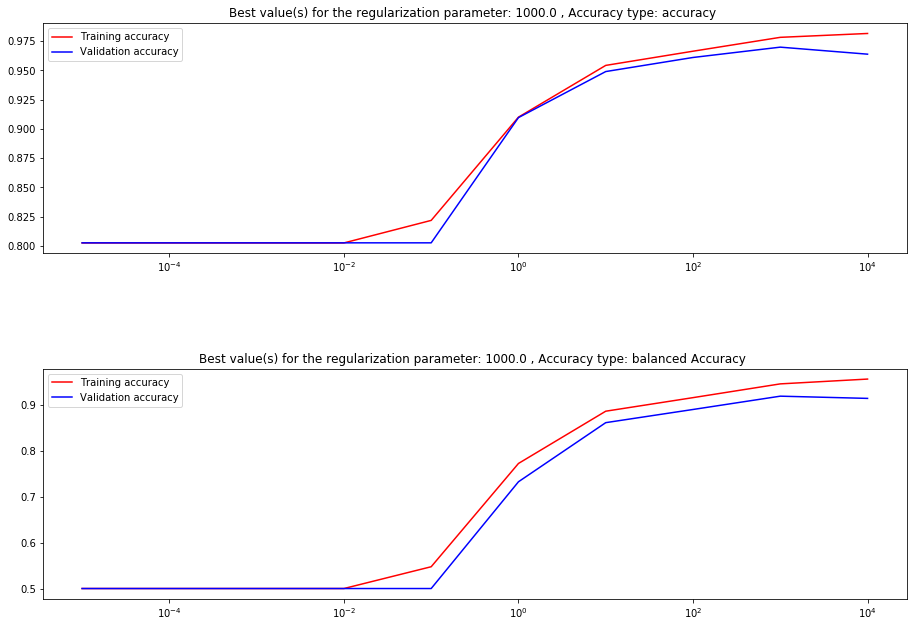

In [36]:
modified_labels = np.where(y==0, -1, 1)
fig, axs = plt.subplots(2, 1)
reg_par_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
KF = KFold(10)
for perf_metric, axs, function_name in zip([calc_accuracy, calc_balanced_accuracy], axs, ["accuracy", "balanced Accuracy"]):
    bestregpar, Vm, Vs, Tm, Ts = Generic_CrossValidation(X, modified_labels, SVC, perf_metric, np.unique(modified_labels), KF,  reg_par_list)
    axs.semilogx(reg_par_list , Tm, 'r')
    axs.semilogx(reg_par_list , Vm, 'b')
    axs.set_title("Best value(s) for the regularization parameter: %s , Accuracy type: %s " % (bestregpar,function_name))
    axs.legend(['Training accuracy', 'Validation accuracy'])
    print ("The maximum value for the validation ", function_name, " is " , np.amax(Vm))
    

fig.subplots_adjust(top=1,bottom=-1,left=-1,right=1, hspace=0.5, wspace=0.5)

The maximum value for the validation  accuracy  is  0.9662939759036142
The maximum value for the validation  balanced accuracy  is  0.9248367346938775


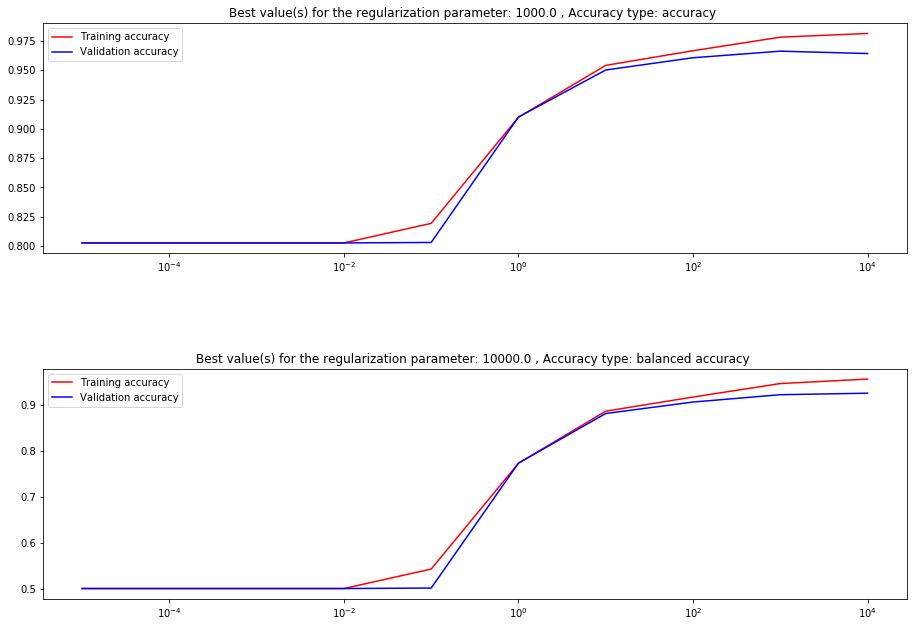

In [37]:
from sklearn.model_selection import StratifiedKFold

modified_labels = np.where(y==0, -1, 1)
fig, axs = plt.subplots(2, 1)
reg_par_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
skf = StratifiedKFold(n_splits=10)
for perf_metric, axs, function_name in zip([calc_accuracy, calc_balanced_accuracy], axs, ["accuracy", "balanced accuracy"]):
    bestregpar, Vm, Vs, Tm, Ts = Generic_CrossValidation(X, modified_labels, SVC, perf_metric, np.unique(modified_labels), skf, reg_par_list)
    axs.semilogx(reg_par_list , Tm, 'r')
    axs.semilogx(reg_par_list , Vm, 'b')
    axs.set_title("Best value(s) for the regularization parameter: %s , Accuracy type: %s " % (bestregpar,function_name))
    axs.legend(['Training accuracy', 'Validation accuracy'])
    print ("The maximum value for the validation ", function_name, " is " , np.amax(Vm))

    

fig.subplots_adjust(top=1,bottom=-1,left=-1,right=1, hspace=0.5, wspace=0.5)


We can observe that the obtained classification performance in the two cases reported above (KFold and StratifiedKFold) is similar for both metrics (accuracy and balanced accuracy, see plots in previous cells). It seems that the balanced accuracy metric penalizes more the validation error both when using StratifiedKFold and KFold. In fact, the maximum value of the balanced accuracy is less than the one of the "plain" accuracy. This becomes more evident if we increase the number of the sampled data which belong to the "negative" class from 1000 to 30000 samples, for instance. We can therefore guess that balanced accuracy may be useful when dealing with unbalanced classes. 

It may happen that (depending on the specific run of this notebook) by running the algorithms with a reasonable number of folds and the numbers of samples provided initially in the notebook for the two classes (2000 for negative class, 492 for positive class, which are reasonable if compared to the original real dataset), we may result in a  classification performance a little greater for what concerns balanced accuracy in case of Stratified K-Fold, even if we have already said that the classification performance is similar. This is the correct behaviour that we would expect from StratifiedKFold splittingn techniques, because they are even with respect to the number of samples for each class to be included in each training/test split, although the subsampled dataset proposed by this exercise is clearly a corner case, and therefore the effect of using such splitting technique is mitigated.
 http://mvpa.blogspot.com/2015/12/balanced-accuracy-what-and-why.html